In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tqdm import tqdm


In [14]:
df = pd.read_csv('../data/cl_papers.csv', index_col=0)
df

,id,title,area,source,year,doi,abstract,semantic_scholar_id
0,main.1004,AnswerFact: Fact Checking in Product Question ...,Question Answering,EMNLP,2020,10.18653/v1/2020.emnlp-main.188,Product-related question answering platforms n...,4c61df1b4b9a164fec1a34587b4fffae029cd18c
1,main.1006,Knowledge-Grounded Dialogue Generation with Pr...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.272,We study knowledge-grounded dialogue generatio...,3447a432f724aa36595643446acda5b78943db19
2,main.1009,BiST: Bi-directional Spatio-Temporal Reasoning...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.145,Video-grounded dialogues are very challenging ...,f4a2acfeb1705df3f430cc53ace26e1dbbbcbd16
3,main.1010,A Knowledge-Aware Sequence-to-Tree Network for...,NLP Applications,EMNLP,2020,10.18653/v1/2020.emnlp-main.579,With the advancements in natural language proc...,24ed85ad966823868c1694a19385d01c6ad71008
4,main.1011,Knowledge Association with Hyperbolic Knowledg...,Information Extraction,EMNLP,2020,10.18653/v1/2020.emnlp-main.460,Capturing associations for knowledge graphs (K...,3d61a28b9429fc8f7047fc379a0134a3765edbcb
...,...,...,...,...,...,...,...,...
9250,T4773,Rank-Aware Negative Training for Semi-Supervis...,Machine Learning for NLP,ACL,2023,10.1162/tacl_a_00574,Abstract Semi-supervised text classification-b...,79a502caa0b12573f56a7e8948459722aa891479
9251,T4777,Transparency Helps Reveal When Language Models...,"Linguistic Theories, Cognitive Modeling, and P...",ACL,2023,10.1162/tacl_a_00565,Many current NLP systems are built from langua...,eee70790ced38b0fcf50351dbb3dcbdb582467e8
9252,T4803,Design Choices for Crowdsourcing Implicit Disc...,Discourse and Pragmatics,ACL,2023,10.1162/tacl_a_00586,Abstract Disagreement in natural language anno...,bf65a1b637e0f253abb8402fc9d0ab80db79aa92
9253,T4929,Time-and-Space-Efficient Weighted Deduction,"Semantics: Sentence-level Semantics, Textual I...",ACL,2023,10.1162/tacl_a_00588,Abstract Many NLP algorithms have been describ...,f1803d124e5af7263ce656f7ccf3219eacc62b1c


In [284]:
mapping = {
  'Cognitive Modeling and Psycholinguistics': 'Linguistic Theories and Psycholinguistics',
  'Commonsense Reasoning': 'Commonsense Reasoning',
  'Computational Social Science and Cultural Analytics': 'Social Science',
  'Computational Social Science and Social Media': 'Social Science',
  'Dialog and Interactive Systems': 'Dialogue',
  'Dialogue and Interactive Systems': 'Dialogue',
  'Discourse and Pragmatics': 'Discourse and Pragmatics',
  'Discourse and Pragmatics & Ethics in NLP': 'Discourse and Pragmatics',
  'Efficient Methods for NLP': 'Efficient Methods',
  'Ethic Concerns:Dialogue and Interactive Systems': 'Ethics',
  'Ethic Concerns:Ethics': 'Ethics',
  'Ethic Concerns:Linguistic Theories, Cognitive Modeling and Psycholinguistics': 'Ethics',
  'Ethic Concerns:Multilinguality': 'Ethics',
  'Ethic Concerns:NLP Applications': 'Ethics',
  'Ethic Concerns:Resources and Evaluation': 'Ethics',
  'Ethic Concerns:Sentiment Analysis, Stylistic Analysis, and Argument Mining': 'Ethics',
  'Ethic Concerns:Speech, Vision, Robotics, Multimodal Grounding': 'Ethics',
  'Ethic Concerns:Unsupervised and Weakly-Supervised Methods in NLP': 'Ethics',
  'Ethics': 'Ethics',
  'Ethics and NLP': 'Ethics',
  'Ethics in NLP': 'Ethics',
  'Generation': 'Generation',
  'Human-Centered NLP': 'Human-Centered NLP',
  'Industry': 'Industry',
  'Information Extraction': 'Information Extraction/Retrieval',
  'Information Retrieval and Text Mining': 'Information Extraction/Retrieval',
  'Interpretability and Analysis of Models for NLP': 'Interpretability and Analysis',
  'Interpretability, Interactivity and Analysis of Models for NLP': 'Interpretability and Analysis',
  'Interpretability, Interactivity, and Analysis of Models for NLP': 'Interpretability and Analysis',
  'Language Generation': 'Generation',
  'Language Grounding to Vision, Robotics and Beyond': 'Multimodality, Speech and Grounding',
  'Language Grounding to Vision, Robotics, and Beyond': 'Multimodality, Speech and Grounding',
  'Language Groundings, Speech and Multimodality': 'Multimodality, Speech and Grounding',
  'Language Modeling and Analysis of Language Models': 'Interpretability and Analysis',
  'Large Language Models': 'Large Language Models',
  'Linguistic Diversity': 'Machine Translation and Multilinguality',
  'Linguistic Theories, Cognitive Modeling and Psycholinguistics': 'Linguistic Theories and Psycholinguistics',
  'Linguistic Theories, Cognitive Modeling, and Psycholinguistics': 'Linguistic Theories and Psycholinguistics',
  'Machine Learning for NLP': 'Machine Learning',
  'Machine Translation': 'Machine Translation and Multilinguality',
  'Machine Translation and Multilinguality': 'Machine Translation and Multilinguality',
  'Multidisciplinary and Area Chair COI': 'Theme',
  'Multilingualism and Cross-Lingual NLP': 'Machine Translation and Multilinguality',
  'Multilinguality': 'Machine Translation and Multilinguality',
  'Multilinguality and Linguistic Diversity': 'Machine Translation and Multilinguality',
  'NLP Applications': 'Applications',
  'Natural Language Generation': 'Generation',
  'Phonology, Morphology and Word Segmentation': 'Phonology, Morphology and Word Segmentation',
  'Phonology, Morphology, and Word Segmentation': 'Phonology, Morphology and Word Segmentation',
  'Question Answering': 'Question Answering',
  'Resources and Evaluation': 'Resources and Evaluation',
  'Semantics': 'Semantics',
  'Semantics: Lexical': 'Semantics',
  'Semantics: Lexical Semantics': 'Semantics',
  'Semantics: Lexical, Sentence level, Document Level, Textual Inference, etc.': 'Semantics',
  'Semantics: Lexical, Sentence level, Textual Inference and Other areas': 'Semantics',
  'Semantics: Sentence Level': 'Semantics',
  'Semantics: Sentence-level Semantics, Textual Inference and Other areas': 'Semantics',
  'Semantics: Sentence-level Semantics, Textual Inference, and Other Areas': 'Semantics',
  'Semantics: Textual Inference and Other Areas of Semantics': 'Semantics',
  'Sentiment Analysis, Stylistic Analysis, and Argument Mining': 'Sentiment Analysis',
  'Special Theme on Language Diversity: From Low Resource to Endangered': 'Theme',
  'Speech and Multimodality': 'Multimodality, Speech and Grounding',
  'Speech, Vision, Robotics, Multimodal Grounding': 'Multimodality, Speech and Grounding',
  'Summarization': 'Summarization',
  'Syntax, Parsing and their Applications': 'Syntax',
  'Syntax: Tagging, Chunking and Parsing': 'Syntax',
  'Syntax: Tagging, Chunking, and Parsing': 'Syntax',
  'Theme': 'Theme',
  'Theme Track': 'Theme',
  'Theme Track: Large Language Models and the Future of NLP': 'Theme',
  'Theme: Reality Check': 'Theme',
  'Theory and Formalism in NLP (Linguistic and Mathematical)': 'Theory and Formalism in NLP',
  'Unsupervised and Weakly-Supervised Methods in NLP': 'Unsupervised and Weakly-Supervised Methods in NLP',
}

dropped_tracks = [
    'Theme',
    'Discourse and Pragmatics',
    'Large Language Models',
    'Industry',
    'Phonology, Morphology and Word Segmentation',
    'Commonsense Reasoning',
    'Human-Centered NLP',
    'Unsupervised and Weakly-Supervised Methods in NLP',
    'Theory and Formalism in NLP',
    'Efficient Methods',
    'Linguistic Theories and Psycholinguistics',
    'Resources and Evaluation',
    'Semantics',
    'Syntax',
    'Applications',
    'Ethics'
]

In [75]:
df_2020 = df[df['year'] >= 2020].copy()
df_2020['track'] = df_2020['area'].map(mapping)
df_2020

,id,title,area,source,year,doi,abstract,semantic_scholar_id,track
0,main.1004,AnswerFact: Fact Checking in Product Question ...,Question Answering,EMNLP,2020,10.18653/v1/2020.emnlp-main.188,Product-related question answering platforms n...,4c61df1b4b9a164fec1a34587b4fffae029cd18c,Question Answering
1,main.1006,Knowledge-Grounded Dialogue Generation with Pr...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.272,We study knowledge-grounded dialogue generatio...,3447a432f724aa36595643446acda5b78943db19,Dialogue
2,main.1009,BiST: Bi-directional Spatio-Temporal Reasoning...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.145,Video-grounded dialogues are very challenging ...,f4a2acfeb1705df3f430cc53ace26e1dbbbcbd16,Dialogue
3,main.1010,A Knowledge-Aware Sequence-to-Tree Network for...,NLP Applications,EMNLP,2020,10.18653/v1/2020.emnlp-main.579,With the advancements in natural language proc...,24ed85ad966823868c1694a19385d01c6ad71008,Applications
4,main.1011,Knowledge Association with Hyperbolic Knowledg...,Information Extraction,EMNLP,2020,10.18653/v1/2020.emnlp-main.460,Capturing associations for knowledge graphs (K...,3d61a28b9429fc8f7047fc379a0134a3765edbcb,Information Extraction/Retrieval
...,...,...,...,...,...,...,...,...,...
9250,T4773,Rank-Aware Negative Training for Semi-Supervis...,Machine Learning for NLP,ACL,2023,10.1162/tacl_a_00574,Abstract Semi-supervised text classification-b...,79a502caa0b12573f56a7e8948459722aa891479,Machine Learning
9251,T4777,Transparency Helps Reveal When Language Models...,"Linguistic Theories, Cognitive Modeling, and P...",ACL,2023,10.1162/tacl_a_00565,Many current NLP systems are built from langua...,eee70790ced38b0fcf50351dbb3dcbdb582467e8,Linguistic Theories and Psycholinguistics
9252,T4803,Design Choices for Crowdsourcing Implicit Disc...,Discourse and Pragmatics,ACL,2023,10.1162/tacl_a_00586,Abstract Disagreement in natural language anno...,bf65a1b637e0f253abb8402fc9d0ab80db79aa92,Discourse and Pragmatics
9253,T4929,Time-and-Space-Efficient Weighted Deduction,"Semantics: Sentence-level Semantics, Textual I...",ACL,2023,10.1162/tacl_a_00588,Abstract Many NLP algorithms have been describ...,f1803d124e5af7263ce656f7ccf3219eacc62b1c,Semantics


In [285]:
df_2020['track'] = df_2020['area'].map(mapping)
df_2020['track'] = df_2020['track'].apply(lambda track: 'Other' if track in dropped_tracks else track)
df_2020['track'].value_counts()

track
Other                                      2441
Information Extraction/Retrieval            674
Machine Translation and Multilinguality     594
Machine Learning                            557
Dialogue                                    487
Interpretability and Analysis               477
Multimodality, Speech and Grounding         389
Generation                                  361
Question Answering                          334
Sentiment Analysis                          258
Summarization                               244
Social Science                              178
Name: count, dtype: int64

# Computing embeddings

In [79]:
from transformers import AutoTokenizer
from adapters import AutoAdapterModel
from tqdm import tqdm
tqdm.pandas()

tokenizer = AutoTokenizer.from_pretrained('allenai/specter2_base')

model = AutoAdapterModel.from_pretrained("allenai/specter2_base")
adapter_name = model.load_adapter("allenai/specter2_classification", source="hf", set_active=True)

def get_embedding(paper_row):
    text = paper_row['title'] + tokenizer.sep_token + paper_row['abstract']
    inputs = tokenizer(text,
                       padding=True,
                       truncation=True,
                       return_tensors="pt",
                       return_token_type_ids=False,
                       max_length=2048)
    output = model(**inputs)
    embeddings = output.last_hidden_state[:, 0, :][0].detach().numpy()
    return embeddings

df_2020['embedding'] = df_2020.progress_apply(get_embedding, axis=1)

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6994/6994 [13:32<00:00,  8.61it/s]


In [286]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import torch

SEED = 42
SPLIT = 0.2

X = np.stack(df_2020['embedding'].values)

label_encoder = LabelEncoder()
y = df_2020['track'].values
y = label_encoder.fit_transform(y)
y = torch.tensor(y, dtype=torch.long)

indices = np.arange(len(df_2020))
train_indices, test_indices = train_test_split(indices, test_size=SPLIT, random_state=SEED)

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

df_train, df_test = df_2020.iloc[train_indices], df_2020.iloc[test_indices]

In [287]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


# we are augmenting the test data with blackboxnlp papers
blackbox_df = pd.read_csv('../data/blackbox_papers.csv', index_col=0)

X_blackbox = np.stack(blackbox_df['embedding'].values) 
X_blackbox = torch.stack([torch.tensor(np.fromstring(x[1:-1], sep='\n'), dtype=torch.float32) for x in X_blackbox])

y_blackbox = blackbox_df['interpretability'].values
y_blackbox = torch.tensor([label_encoder.transform(['Interpretability and Analysis'])[0] if label else 0 for label in y_blackbox], dtype=torch.long)
X_augmented_train = torch.cat((X_train, X_blackbox), dim=0)
y_augmented_train = torch.cat((y_train, y_blackbox), dim=0)


/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_46026/3748808886.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_46026/3748808886.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)


In [288]:
import torch
import torch.nn as nn
import torch.optim as optim


class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)


    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = torch.softmax(out, dim=-1)
        return out


In [327]:
HIDDEN_SIZE = 400 
BATCH_SIZE = 250
LR = 0.001
INPUT_SIZE = X_train.shape[1]
OUTPUT_SIZE = max(y_train) + 1

In [328]:
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
import torch
import numpy as np

X_train_tensor = torch.tensor(X_augmented_train, dtype=torch.float32)
y_train_tensor = torch.tensor(X_augmented_train, dtype=torch.long)

train_dataset = TensorDataset(X_augmented_train, y_augmented_train)

class_sample_count = np.array([len(np.where(y_train == t)[0]) for t in np.unique(y_augmented_train)])
class_weights = 1. / class_sample_count
class_weights[label_encoder.transform(['Other'])[0]]*=2
class_weights[label_encoder.transform(['Interpretability and Analysis'])[0]]*=2
samples_weights = np.array([class_weights[t] for t in y_train])
samples_weights = torch.from_numpy(samples_weights)
samples_weights = samples_weights.double()

sampler = WeightedRandomSampler(samples_weights, len(samples_weights))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_46026/2651607641.py:5: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_46026/2651607641.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_46026/2651607641.py:22: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_46026/2651607641.py:23: UserWarning:

To copy construct from a tensor, it is recommended to use sour

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 20.98it/s]


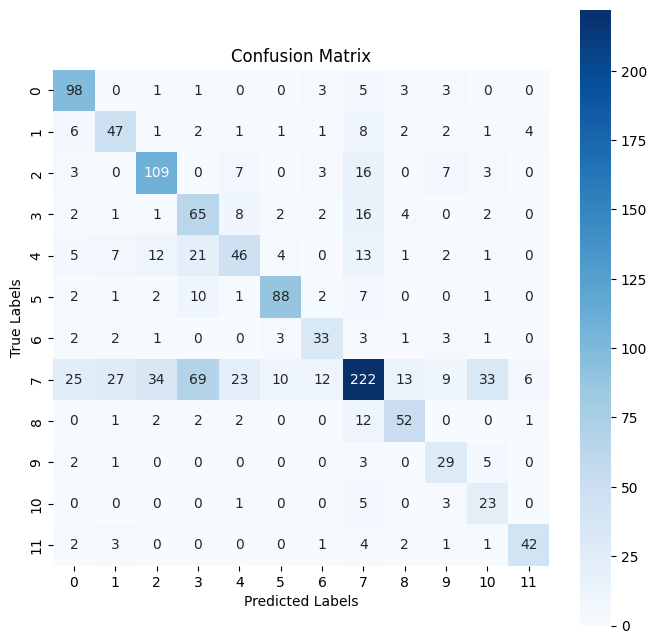

F1 macroScore: 0.6184207427429228
F1 microScore: 0.6104360257326662


In [329]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
from tqdm import tqdm

model = MLPClassifier(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.995)
EPOCHS = 50
SEED = 42
torch.manual_seed(SEED)
torch.use_deterministic_algorithms(True)

for epoch in tqdm(range(EPOCHS)):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.float(), labels.float()
        outputs = model(inputs)
        max_probs, predicted = torch.max(outputs, 1)
        
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())
cm = confusion_matrix(y_true, y_pred)
labels = label_encoder.inverse_transform(list(range(OUTPUT_SIZE)))
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()
score = f1_score(y_true, y_pred, average='macro')
print("F1 macroScore:", score)
score = f1_score(y_true, y_pred, average='micro')
print("F1 microScore:", score)


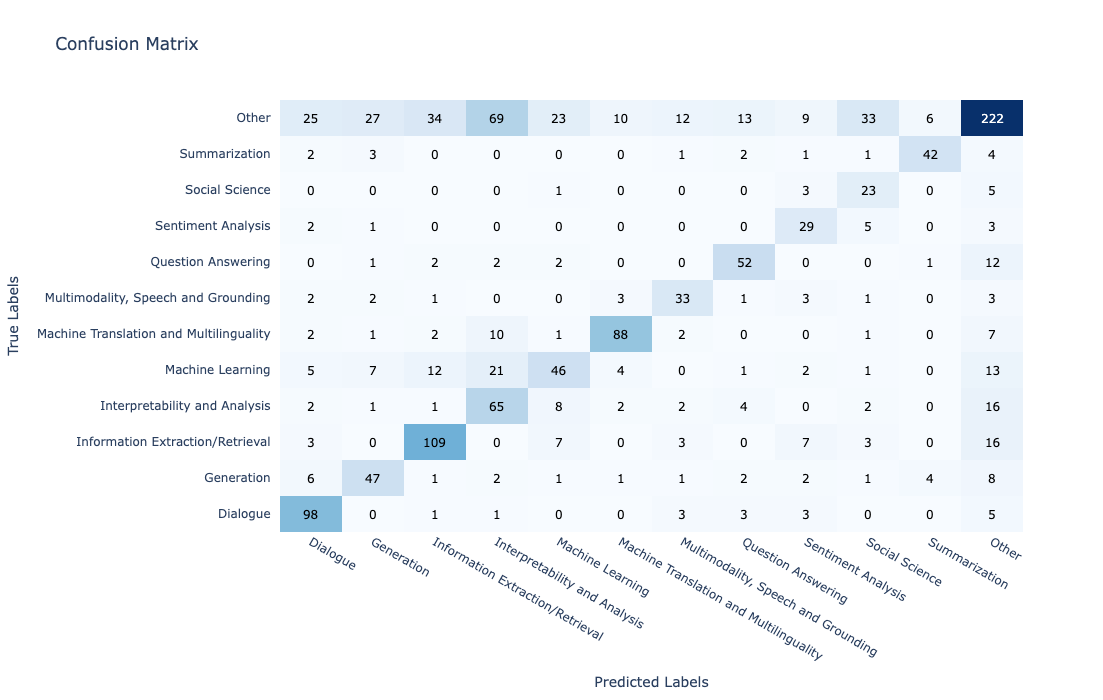

F1 Macro Score: 0.6184207427429228
F1 Micro Score: 0.6104360257326662


In [330]:
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score

cm = confusion_matrix(y_true, y_pred)
labels = list(label_encoder.inverse_transform(list(range(OUTPUT_SIZE))))

other_label = 'Other'
sorted_labels = sorted([label for label in labels if label != other_label])
sorted_labels.append(other_label)

label_to_sorted_index = {label: index for index, label in enumerate(sorted_labels)}
sorted_cm = np.zeros_like(cm)

for i, label1 in enumerate(labels):
    for j, label2 in enumerate(labels):
        sorted_i = label_to_sorted_index[label1]
        sorted_j = label_to_sorted_index[label2]
        sorted_cm[sorted_i, sorted_j] = cm[i, j]

fig = ff.create_annotated_heatmap(
    z=sorted_cm, 
    x=sorted_labels, 
    y=sorted_labels, 
    colorscale='Blues'
)

fig.update_layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted Labels', side='bottom'),
    yaxis=dict(title='True Labels'),
    height=700
)

fig.show()

score_macro = f1_score(y_true, y_pred, average='macro')
print("F1 Macro Score:", score_macro)
score_micro = f1_score(y_true, y_pred, average='micro')
print("F1 Micro Score:", score_micro)


In [331]:
from sklearn.metrics import f1_score

y_pred = []
y_true = []

n = 0
model.eval()
with torch.no_grad():
    for index, row in df_test.iterrows():
        vector = row['embedding']
        output = model(torch.tensor(vector))
        pred = torch.argmax(output)
        pred = int(output[3] > 0.5)

        if pred and 'analysis' not in row['area'].lower():
            n += 1
            print(row['area'])
            print(row['title'])
            print(row['abstract'])
            print('-' * 100)

n

Large Language Models
Controlling the Extraction of Memorized Data from Large Language Models via Prompt-Tuning
Large Language Models (LLMs) are known to memorize significant portions of their training data. Parts of this memorized content have been shown to be extractable by simply querying the model, which poses a privacy risk. We present a novel approach which uses prompt-tuning to control the extraction rates of memorized content in LLMs. We present two prompt training strategies to increase and decrease extraction rates, which correspond to an attack and a defense, respectively. We demonstrate the effectiveness of our techniques by using models from the GPT-Neo family on a public benchmark. For the 1.3B parameter GPT-Neo model, our attack yields a 9.3 percentage point increase in extraction rate compared to our baseline. Our defense can be tuned to achieve different privacy-utility trade-offs by a user-specified hyperparameter. We achieve an extraction rate reduction of up to 97.7

102

In [332]:
torch.save(model.state_dict(), './general-classifier-weights.pt')